# Paris Trading

In [34]:
from yahoo_finance import Share
import matplotlib.patches as mpatches
import statsmodels
from statsmodels.tsa.stattools import coint

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import numpy as np
import pandas as pd
import statsmodels.api as sm
# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression
import matplotlib.pyplot as plt
%matplotlib inline

# Grab some cointegrated assets

In [52]:
sp = Share('GOLD')
dw = Share('SLV')
start = '2012-01-01'
end = '2016-01-01'

ass1 = sp.get_historical(start, end)
ass2 = dw.get_historical(start, end)

In [53]:
df1 = pd.DataFrame(ass1).sort_values('Date')
df2 = pd.DataFrame(ass2).sort_values('Date')

df1['Close'] = df1['Close'].astype('float64')
df2['Close'] = df2['Close'].astype('float64')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

df1=df1.set_index('Date')
df2=df2.set_index('Date')

In [54]:
SP500 = df1['Close']
DOW = df2['Close']

In [55]:
SP500.head()

Date
2012-01-03    108.290001
2012-01-04    108.139999
2012-01-05    108.269997
2012-01-06    107.120003
2012-01-09    107.620003
Name: Close, dtype: float64

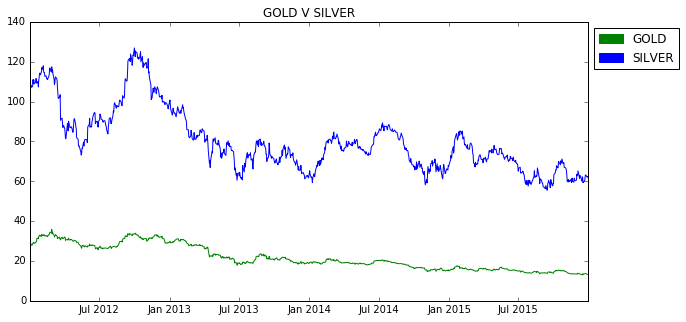

In [64]:
plt.figure(figsize=(10,5))
plt.plot(SP500)
plt.plot(DOW)
plt.title("GOLD V SILVER")
g_patch = mpatches.Patch(color='green', label='GOLD')
b_patch = mpatches.Patch(color='blue', label='SILVER')
plt.legend(handles=[g_patch,b_patch],bbox_to_anchor=(1,1),loc=2)
plt.show()

# Check for Cointegration

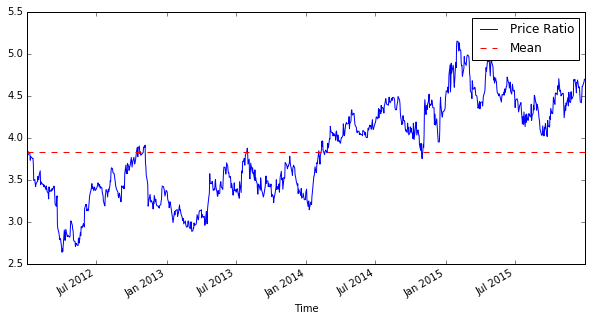

In [68]:
plt.figure(figsize=(10,5))
(SP500/DOW).plot() # Plot the ratio
plt.axhline((SP500/DOW).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean']);

In [69]:
score, pvalue, _ = coint(SP500,DOW)
print pvalue

0.0438213982694


In [60]:
DOW.corr(SP500)

0.8751505650422311

In [67]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

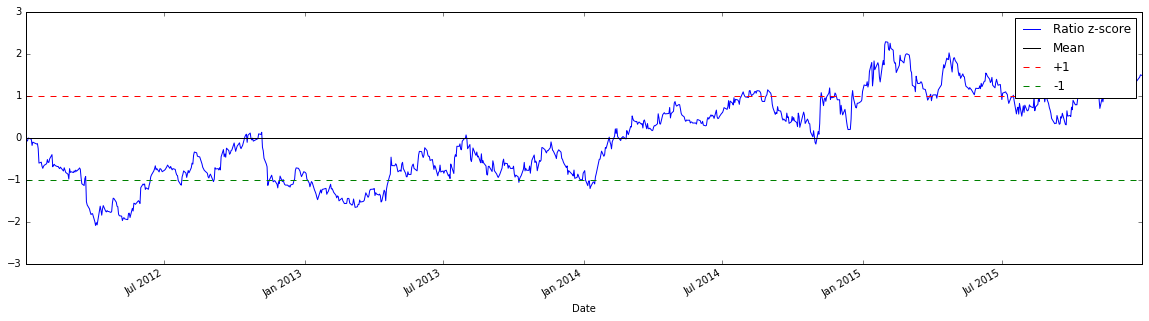

In [73]:
plt.figure(figsize=(20,5))
zscore(SP500/DOW).plot()
plt.axhline(zscore(SP500/DOW).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1']);